Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147182 entries, 0 to 147181
Data columns (total 27 columns):
 #   Column                                                 Non-Null Count   Dtype  
---  ------                                                 --------------   -----  
 0   index                                                  147182 non-null  int64  
 1   Data                                                   147182 non-null  object 
 2   Hora                                                   147182 non-null  object 
 3   PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                       147182 non-null  float64
 4   PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)  147182 non-null  float64
 5   PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)        147182 non-null  float64
 6   PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)       147182 non-null  float64
 7   RADIACAO GLOBAL (Kj/m²)                                147182 non-null  int64  
 8   TEMPERATURA DO AR - 

<ipython-input-22-55017efb14ed>:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
<ipython-input-22-55017efb14ed>:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 


Missing Values after Cleaning:
index                                                    0
Data                                                     0
Hora                                                     0
PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                         0
PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)    0
PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)          0
PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)         0
RADIACAO GLOBAL (Kj/m²)                                  0
TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)             0
TEMPERATURA DO PONTO DE ORVALHO (°C)                     0
TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)               0
TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)               0
TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)         0
TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)         0
UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)                 0
UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)                 0
UMIDADE RELATIVA DO AR, 

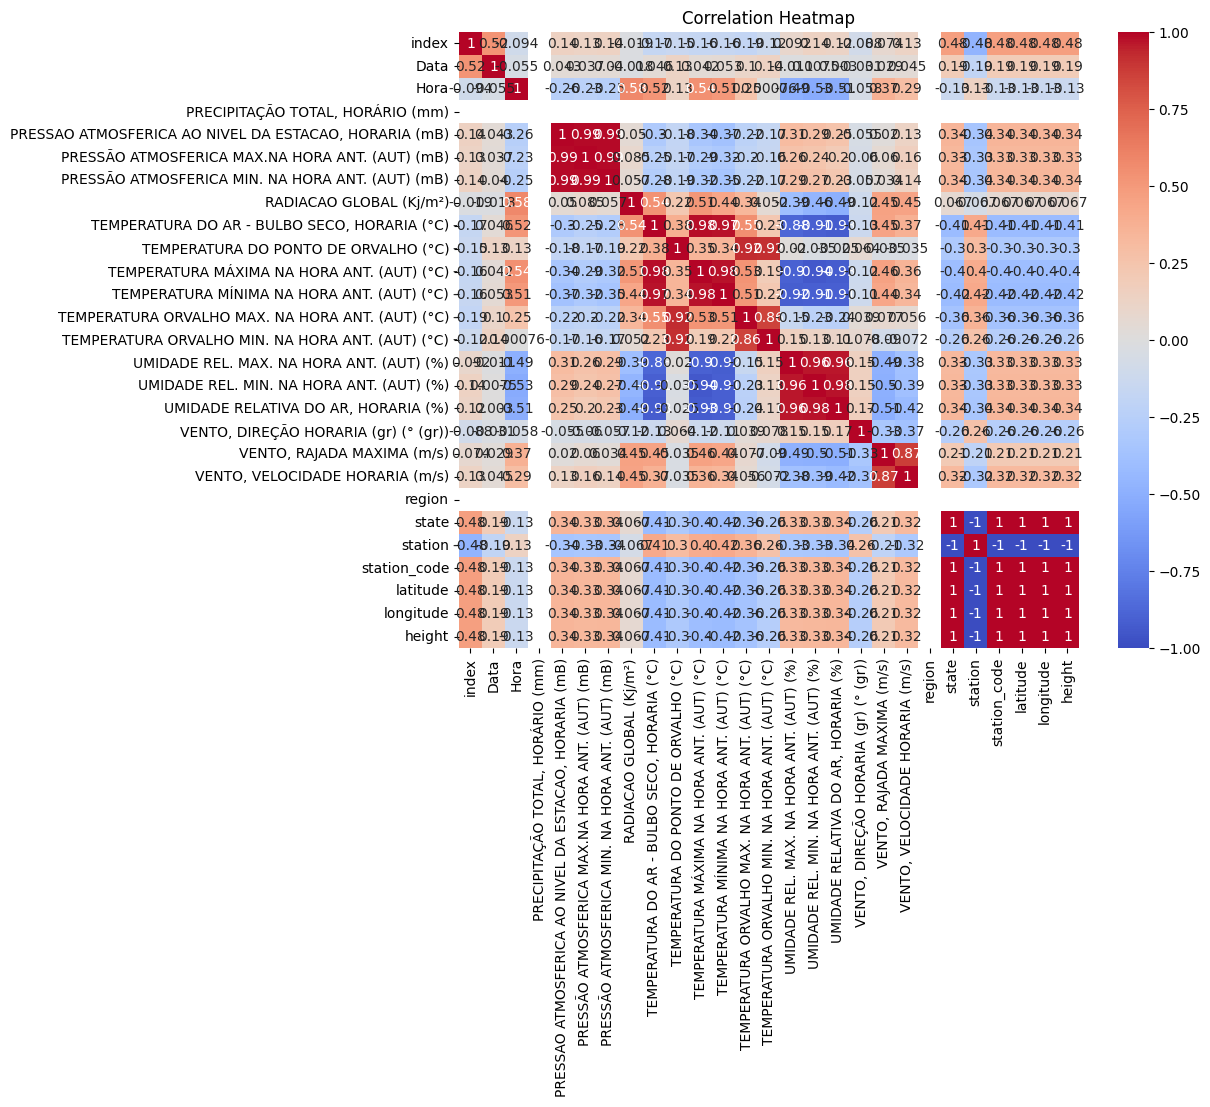

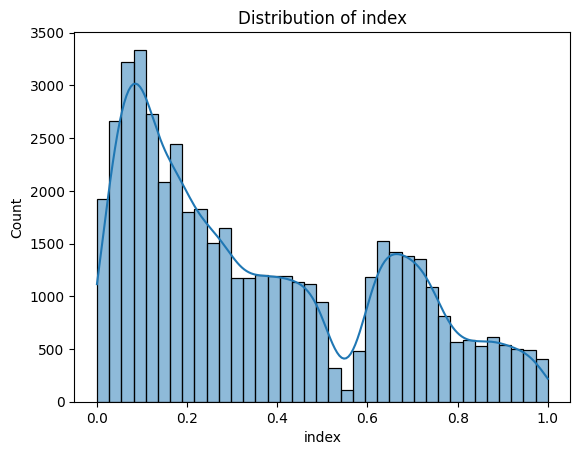

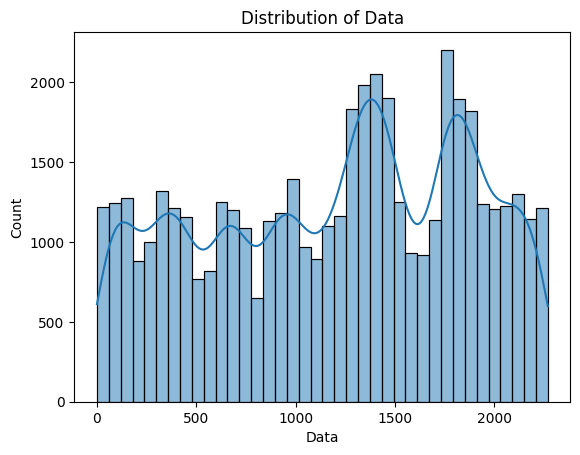

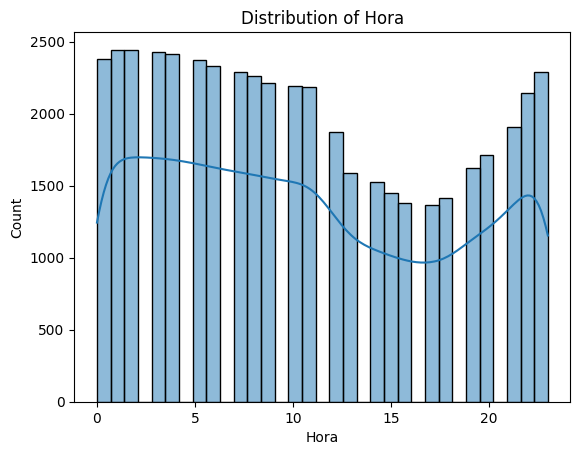

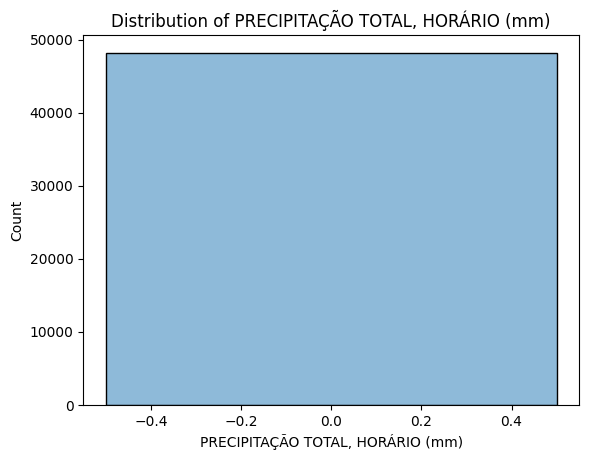

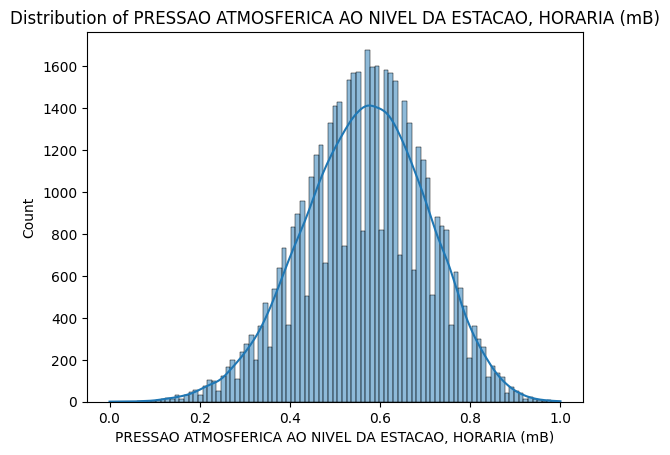

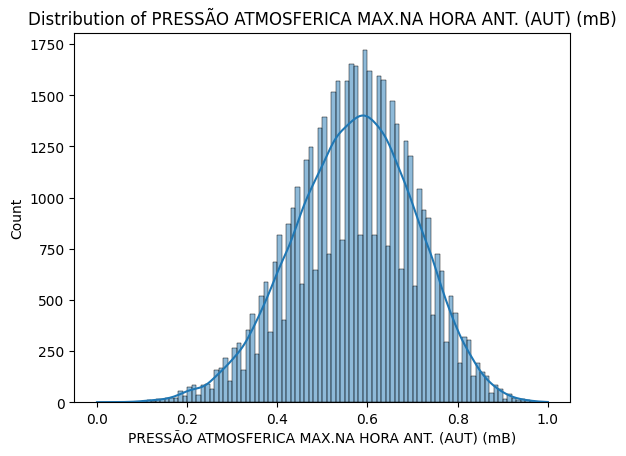

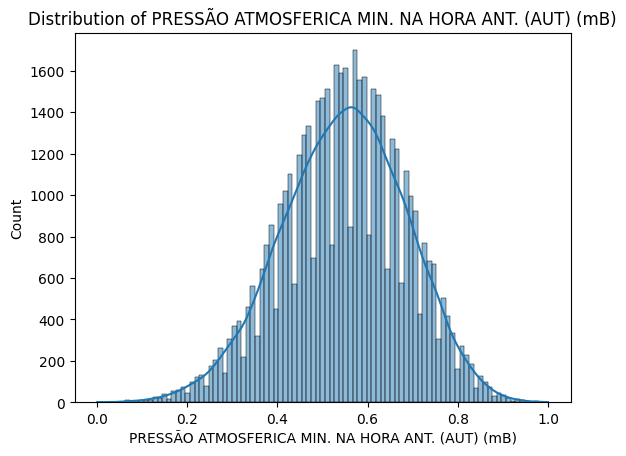

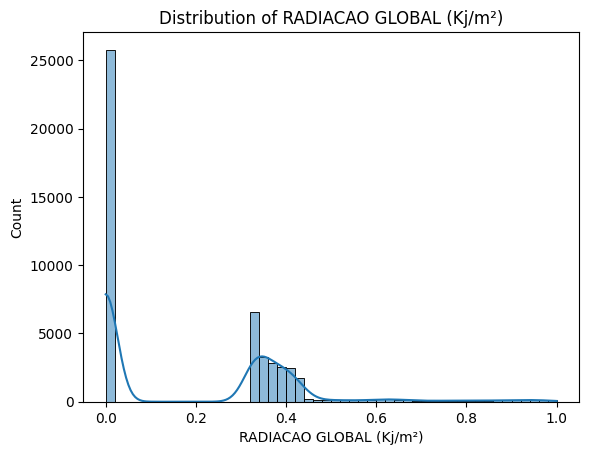

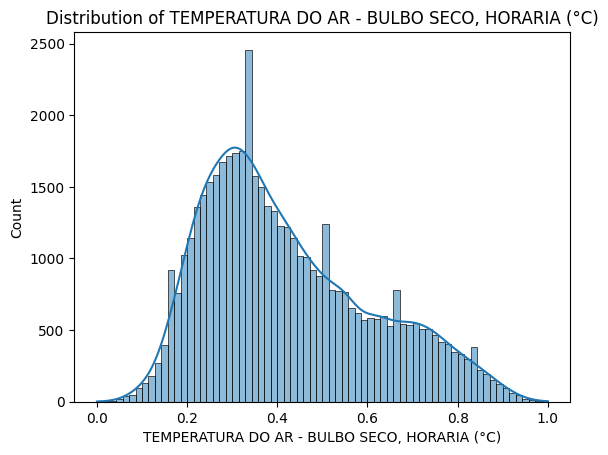

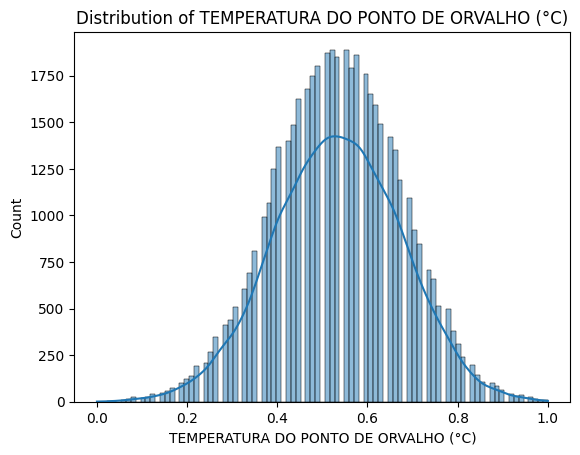

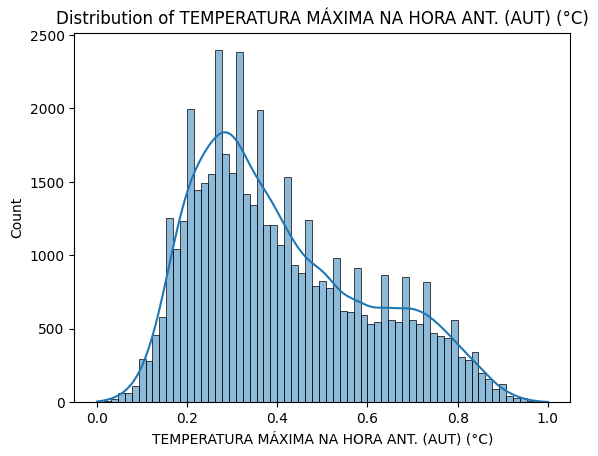

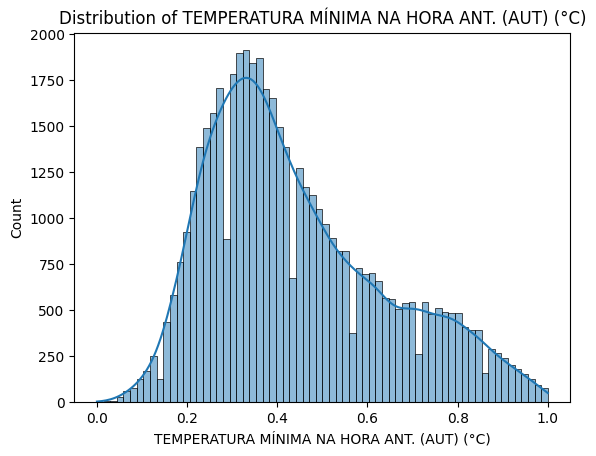

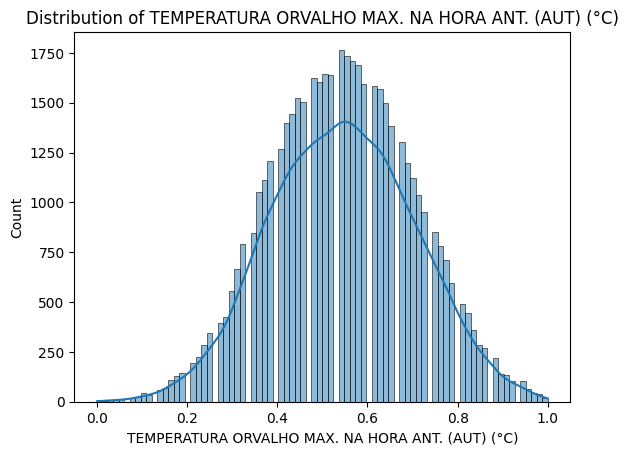

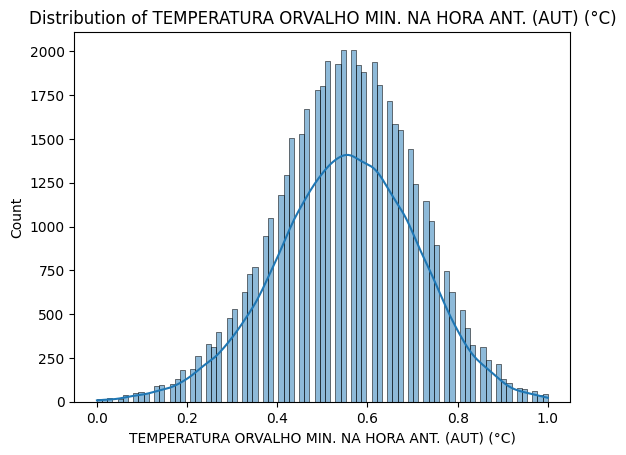

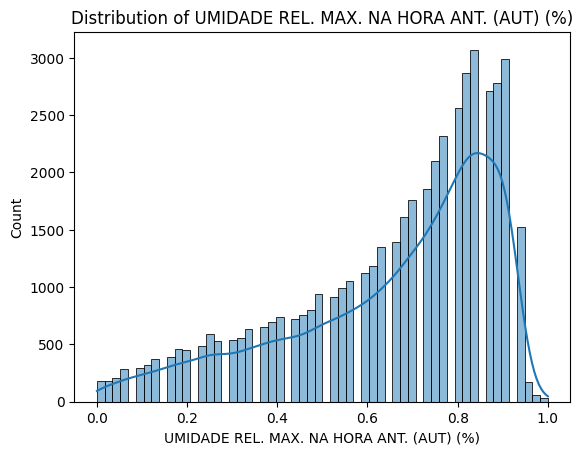

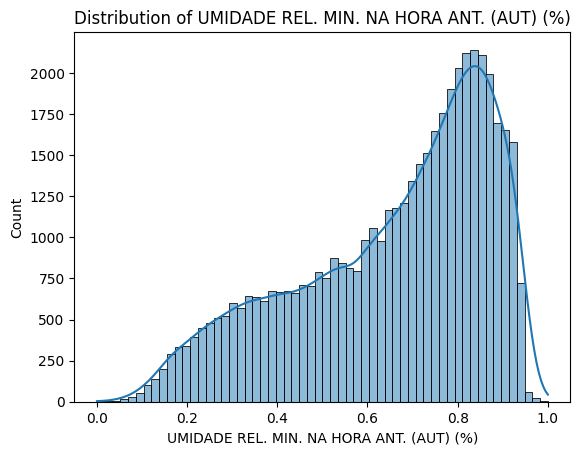

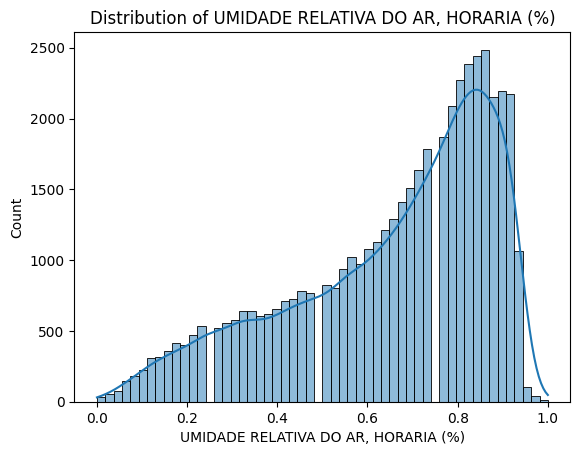

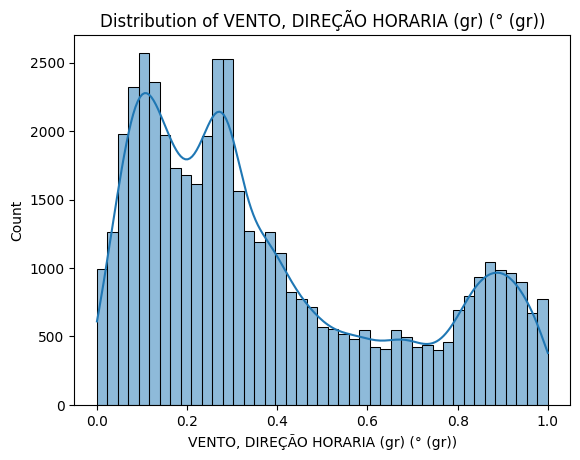

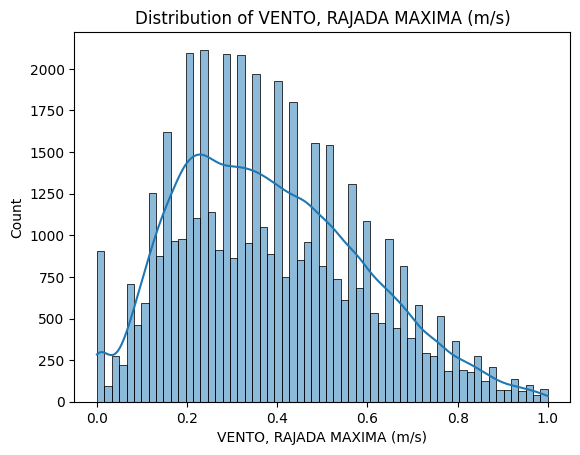

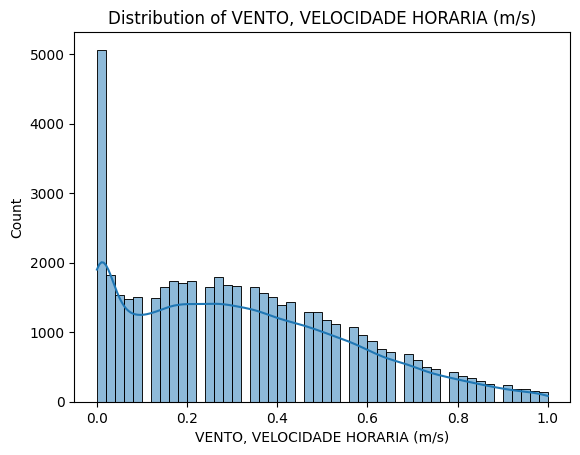

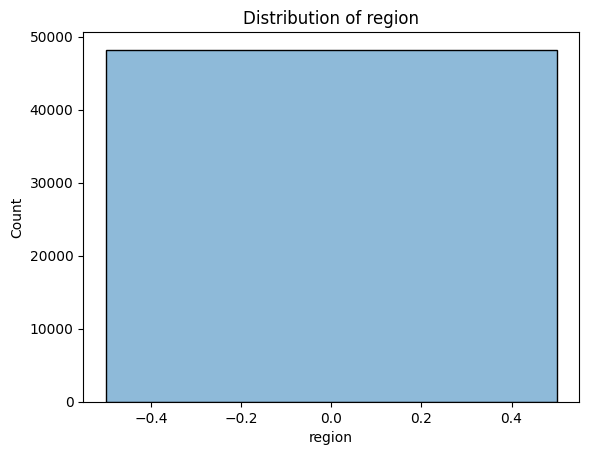

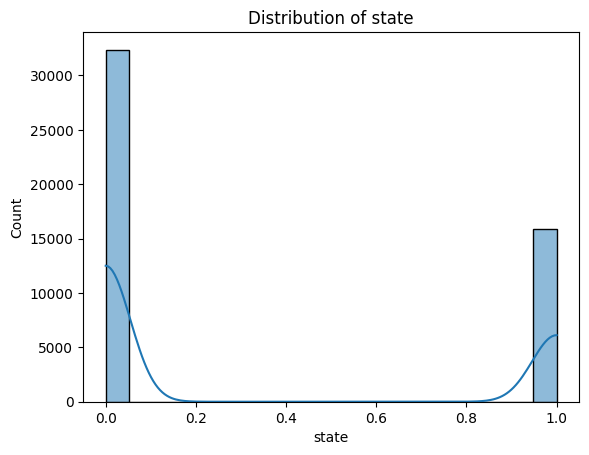

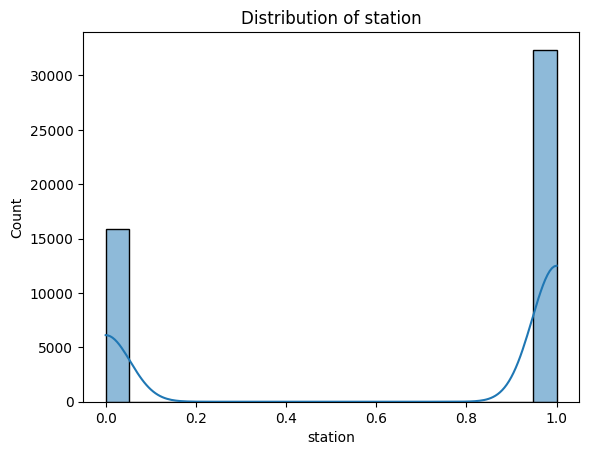

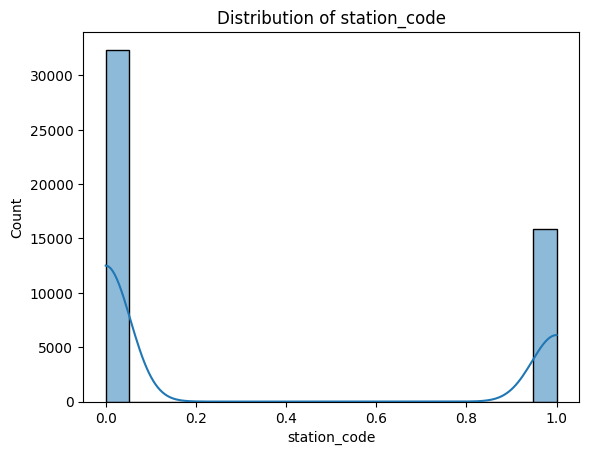

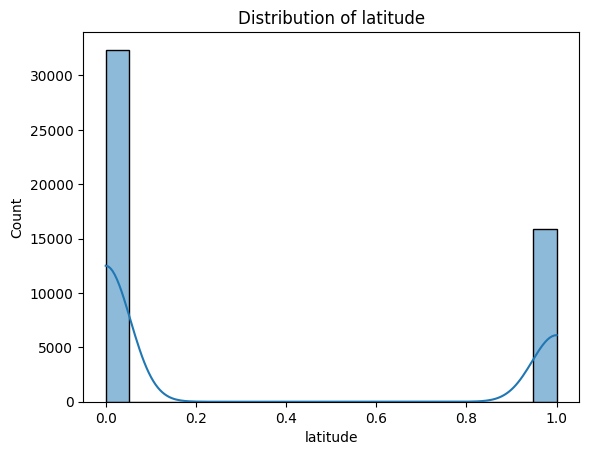

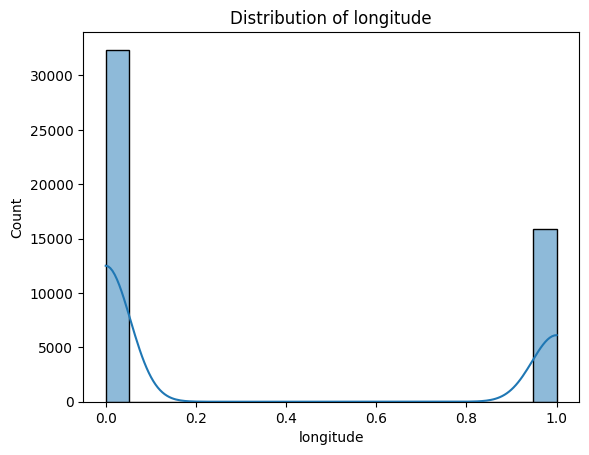

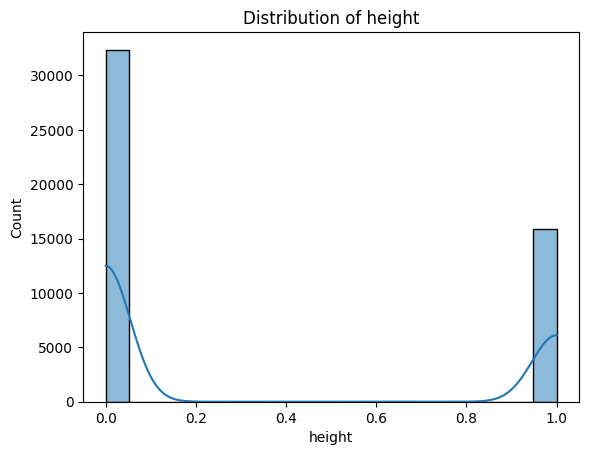


Final Processed Dataset Preview:
       index  Data  Hora  PRECIPITAÇÃO TOTAL, HORÁRIO (mm)  \
21  0.000626     0    21                               0.0   
22  0.000656     0    22                               0.0   
23  0.000686     0    23                               0.0   
24  0.000715     1     0                               0.0   
25  0.000745     1     1                               0.0   

    PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)  \
21                                           0.449704       
22                                           0.461538       
23                                           0.520710       
24                                           0.568047       
25                                           0.621302       

    PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)  \
21                                         0.449704   
22                                         0.449704   
23                                         0.508876   
24    

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

df = pd.read_csv('/content/north.csv')

print("Dataset Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

print("\nMissing Values per Column:")
print(df.isnull().sum())

for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col].fillna(df[col].mean(), inplace=True)

for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

print("\nMissing Values after Cleaning:")
print(df.isnull().sum())

def remove_outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df = remove_outliers(df, col)

scaler = MinMaxScaler()
df[df.select_dtypes(include=['float64', 'int64']).columns] = scaler.fit_transform(df.select_dtypes(include=['float64', 'int64']))

label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

print("\nSummary Statistics:")
print(df.describe())

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

for col in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


print("\nFinal Processed Dataset Preview:")
print(df.head())

df.to_csv('processed_dataset.csv', index=False)
print("Processed dataset saved as 'processed_dataset.csv'.")


In [24]:
import pandas as pd

file_path = '/content/processed_dataset.csv'
data = pd.read_csv(file_path)

file_1_data = data.iloc[:len(data)//2]
file_2_data = data.iloc[len(data)//2:]

file_1_path = 'file_1.csv'
file_2_path = 'file_2.csv'

file_1_data.to_csv(file_1_path, index=False)
file_2_data.to_csv(file_2_path, index=False)

print(f"Data split into:\n1. {file_1_path}\n2. {file_2_path}")

Data split into:
1. file_1.csv
2. file_2.csv


In [23]:
import pandas as pd
df = pd.read_csv('/content/processed_dataset.csv')
df

,index,Data,Hora,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),...,"VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",region,state,station,station_code,latitude,longitude,height
0,0.000626,0,21,0.0,0.449704,0.449704,0.449704,0.335303,0.623288,0.535211,...,0.264624,0.337209,0.195122,0,0,1,0,0.0,0.0,0.0
1,0.000656,0,22,0.0,0.461538,0.449704,0.443787,0.328781,0.452055,0.676056,...,0.509749,0.220930,0.024390,0,0,1,0,0.0,0.0,0.0
2,0.000686,0,23,0.0,0.520710,0.508876,0.461538,0.000000,0.356164,0.647887,...,0.832869,0.174419,0.024390,0,0,1,0,0.0,0.0,0.0
3,0.000715,1,0,0.0,0.568047,0.556213,0.526627,0.000000,0.321918,0.647887,...,0.005571,0.093023,0.048780,0,0,1,0,0.0,0.0,0.0
4,0.000745,1,1,0.0,0.621302,0.609467,0.568047,0.000000,0.301370,0.591549,...,0.470752,0.127907,0.024390,0,0,1,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48206,0.291684,2270,18,0.0,0.508876,0.550296,0.508876,0.364749,0.780822,0.521127,...,0.342618,0.325581,0.341463,0,0,1,0,0.0,0.0,0.0
48207,0.291744,2270,20,0.0,0.443787,0.455621,0.437870,0.339726,0.554795,0.647887,...,0.888579,0.337209,0.219512,0,0,1,0,0.0,0.0,0.0
48208,0.291773,2270,21,0.0,0.461538,0.455621,0.426036,0.337595,0.520548,0.774648,...,0.459610,0.523256,0.195122,0,0,1,0,0.0,0.0,0.0
48209,0.291803,2270,22,0.0,0.502959,0.491124,0.455621,0.329007,0.452055,0.690141,...,0.529248,0.523256,0.512195,0,0,1,0,0.0,0.0,0.0


In [26]:
import pandas as pd
df = pd.read_csv('/content/file_1.csv')
df

,index,Data,Hora,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),...,"VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",region,state,station,station_code,latitude,longitude,height
0,0.000626,0,21,0.0,0.449704,0.449704,0.449704,0.335303,0.623288,0.535211,...,0.264624,0.337209,0.195122,0,0,1,0,0.0,0.0,0.0
1,0.000656,0,22,0.0,0.461538,0.449704,0.443787,0.328781,0.452055,0.676056,...,0.509749,0.220930,0.024390,0,0,1,0,0.0,0.0,0.0
2,0.000686,0,23,0.0,0.520710,0.508876,0.461538,0.000000,0.356164,0.647887,...,0.832869,0.174419,0.024390,0,0,1,0,0.0,0.0,0.0
3,0.000715,1,0,0.0,0.568047,0.556213,0.526627,0.000000,0.321918,0.647887,...,0.005571,0.093023,0.048780,0,0,1,0,0.0,0.0,0.0
4,0.000745,1,1,0.0,0.621302,0.609467,0.568047,0.000000,0.301370,0.591549,...,0.470752,0.127907,0.024390,0,0,1,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24100,0.372340,1343,12,0.0,0.863905,0.857988,0.840237,0.957833,0.431507,0.521127,...,0.286908,0.372093,0.439024,0,1,0,1,1.0,1.0,1.0
24101,0.372519,1343,18,0.0,0.680473,0.721893,0.680473,0.919056,0.773973,0.309859,...,0.264624,0.697674,0.512195,0,1,0,1,1.0,1.0,1.0
24102,0.372548,1343,19,0.0,0.650888,0.668639,0.650888,0.878794,0.732877,0.295775,...,0.331476,0.790698,0.780488,0,1,0,1,1.0,1.0,1.0
24103,0.372578,1343,20,0.0,0.650888,0.644970,0.639053,0.758362,0.698630,0.253521,...,0.245125,0.616279,0.585366,0,1,0,1,1.0,1.0,1.0


In [25]:
import pandas as pd
df = pd.read_csv('/content/file_2.csv')
df

,index,Data,Hora,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),...,"VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",region,state,station,station_code,latitude,longitude,height
0,0.372668,1343,23,0.0,0.751479,0.739645,0.698225,0.000000,0.294521,0.394366,...,0.052925,0.511628,0.536585,0,1,0,1,1.0,1.0,1.0
1,0.372697,1344,0,0.0,0.810651,0.798817,0.751479,0.000000,0.356164,0.352113,...,0.144847,0.441860,0.609756,0,1,0,1,1.0,1.0,1.0
2,0.372727,1344,1,0.0,0.846154,0.834320,0.810651,0.000000,0.335616,0.366197,...,0.153203,0.581395,0.536585,0,1,0,1,1.0,1.0,1.0
3,0.372757,1344,2,0.0,0.840237,0.834320,0.834320,0.000000,0.294521,0.366197,...,0.105850,0.418605,0.390244,0,1,0,1,1.0,1.0,1.0
4,0.372787,1344,3,0.0,0.828402,0.834320,0.828402,0.000000,0.287671,0.394366,...,0.211699,0.383721,0.292683,0,1,0,1,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24101,0.291684,2270,18,0.0,0.508876,0.550296,0.508876,0.364749,0.780822,0.521127,...,0.342618,0.325581,0.341463,0,0,1,0,0.0,0.0,0.0
24102,0.291744,2270,20,0.0,0.443787,0.455621,0.437870,0.339726,0.554795,0.647887,...,0.888579,0.337209,0.219512,0,0,1,0,0.0,0.0,0.0
24103,0.291773,2270,21,0.0,0.461538,0.455621,0.426036,0.337595,0.520548,0.774648,...,0.459610,0.523256,0.195122,0,0,1,0,0.0,0.0,0.0
24104,0.291803,2270,22,0.0,0.502959,0.491124,0.455621,0.329007,0.452055,0.690141,...,0.529248,0.523256,0.512195,0,0,1,0,0.0,0.0,0.0



Performing Hyperparameter Tuning...

Best Parameters: {'C': 1.7648852816008436, 'epsilon': 0.031233911067827615, 'gamma': 0.028182496720710062}

Mean Squared Error (MSE): 0.0010
Root Mean Squared Error (RMSE): 0.0323


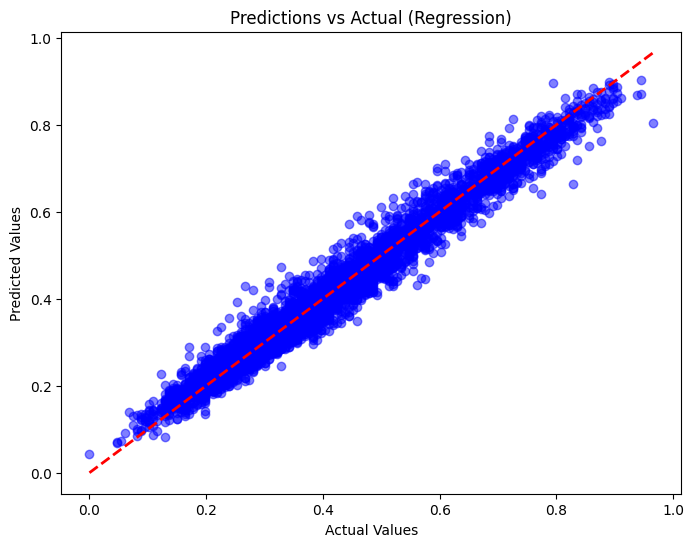

In [29]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR, SVC
from sklearn.metrics import (
    classification_report, accuracy_score,
    precision_score, recall_score, f1_score,
    mean_squared_error
)
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from scipy.stats import uniform
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

df = pd.read_csv('/content/file_1.csv')

target_column = 'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'  # Update target column
if target_column not in df.columns:
    raise ValueError(f"Target column '{target_column}' not found in the dataset.")

X = df.drop(columns=[target_column])
y = df[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

if len(np.unique(y)) > 10:
    model_type = "Regression"
    base_model = SVR(kernel='rbf')

    param_dist = {
        'C': uniform(0.1, 2),
        'epsilon': uniform(0.01, 0.1),
        'gamma': uniform(0.01, 0.1)
    }
else:
    model_type = "Classification"
    base_model = SVC(kernel='rbf')

    param_dist = {
        'C': uniform(0.1, 2),
        'gamma': uniform(0.01, 0.1)
    }

print("\nPerforming Hyperparameter Tuning...")
random_search = RandomizedSearchCV(
    estimator=base_model,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    scoring='accuracy' if model_type == "Classification" else 'neg_mean_squared_error',
    n_jobs=-1,
    random_state=42
)
random_search.fit(X_train, y_train)
print("\nBest Parameters:", random_search.best_params_)

optimized_model = random_search.best_estimator_
optimized_model.fit(X_train, y_train)

y_pred = optimized_model.predict(X_test)

if model_type == "Classification":

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title("Confusion Matrix")
    plt.show()
else:

    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    print(f"\nMean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
    plt.title("Predictions vs Actual (Regression)")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.show()



Performing Hyperparameter Tuning...

Best Parameters: {'C': 1.2973169683940733, 'epsilon': 0.025601864044243652, 'gamma': 0.025599452033620268}

Mean Squared Error (MSE): 0.0010
Root Mean Squared Error (RMSE): 0.0308


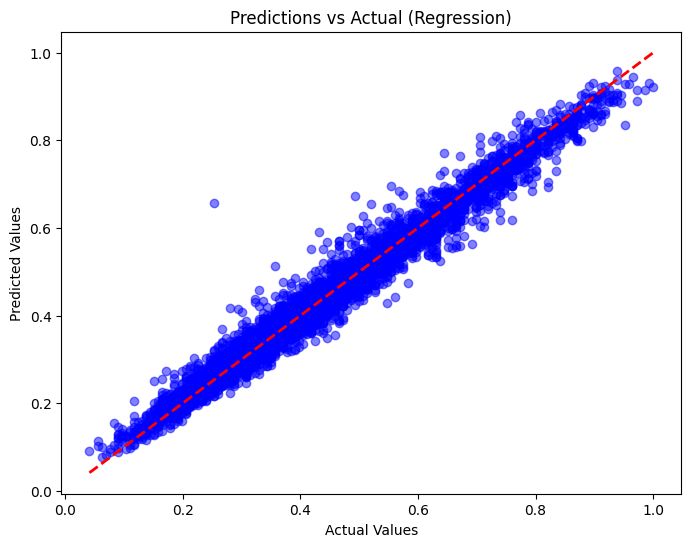

In [30]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR, SVC
from sklearn.metrics import (
    classification_report, accuracy_score,
    precision_score, recall_score, f1_score,
    mean_squared_error
)
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from scipy.stats import uniform
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

df = pd.read_csv('/content/file_2.csv')

target_column = 'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'
if target_column not in df.columns:
    raise ValueError(f"Target column '{target_column}' not found in the dataset.")

X = df.drop(columns=[target_column])
y = df[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

if len(np.unique(y)) > 10:
    model_type = "Regression"
    base_model = SVR(kernel='rbf')

    param_dist = {
        'C': uniform(0.1, 2),
        'epsilon': uniform(0.01, 0.1),
        'gamma': uniform(0.01, 0.1)
    }
else:
    model_type = "Classification"
    base_model = SVC(kernel='rbf')

    param_dist = {
        'C': uniform(0.1, 2),
        'gamma': uniform(0.01, 0.1)
    }

print("\nPerforming Hyperparameter Tuning...")
random_search = RandomizedSearchCV(
    estimator=base_model,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    scoring='accuracy' if model_type == "Classification" else 'neg_mean_squared_error',
    n_jobs=-1,
    random_state=42
)
random_search.fit(X_train, y_train)
print("\nBest Parameters:", random_search.best_params_)

optimized_model = random_search.best_estimator_
optimized_model.fit(X_train, y_train)

y_pred = optimized_model.predict(X_test)

if model_type == "Classification":
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title("Confusion Matrix")
    plt.show()
else:

    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    print(f"\nMean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
    plt.title("Predictions vs Actual (Regression)")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.show()



Performing Hyperparameter Tuning...

Best Parameters: {'C': 1.2973169683940733, 'epsilon': 0.025601864044243652, 'gamma': 0.025599452033620268}

Mean Squared Error (MSE): 0.0009
Root Mean Squared Error (RMSE): 0.0307


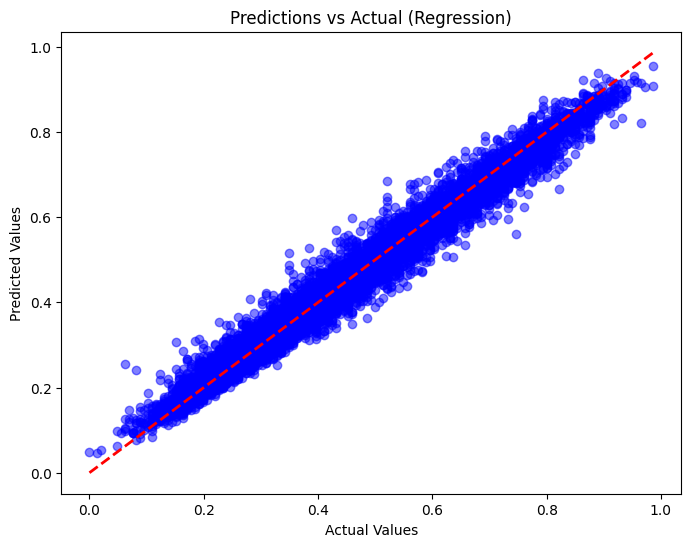

In [36]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR, SVC
from sklearn.metrics import (
    classification_report, accuracy_score,
    precision_score, recall_score, f1_score,
    mean_squared_error
)
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from scipy.stats import uniform
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

df = pd.read_csv('/content/processed_dataset_north.csv')

target_column = 'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'  # Update target column
if target_column not in df.columns:
    raise ValueError(f"Target column '{target_column}' not found in the dataset.")

X = df.drop(columns=[target_column])
y = df[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

if len(np.unique(y)) > 10:
    model_type = "Regression"
    base_model = SVR(kernel='rbf')

    param_dist = {
        'C': uniform(0.1, 2),
        'epsilon': uniform(0.01, 0.1),
        'gamma': uniform(0.01, 0.1)
    }
else:
    model_type = "Classification"
    base_model = SVC(kernel='rbf')

    param_dist = {
        'C': uniform(0.1, 2),
        'gamma': uniform(0.01, 0.1)
    }

print("\nPerforming Hyperparameter Tuning...")
random_search = RandomizedSearchCV(
    estimator=base_model,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    scoring='accuracy' if model_type == "Classification" else 'neg_mean_squared_error',
    n_jobs=-1,
    random_state=42
)
random_search.fit(X_train, y_train)
print("\nBest Parameters:", random_search.best_params_)

optimized_model = random_search.best_estimator_
optimized_model.fit(X_train, y_train)

y_pred = optimized_model.predict(X_test)

if model_type == "Classification":

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title("Confusion Matrix")
    plt.show()
else:

    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    print(f"\nMean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
    plt.title("Predictions vs Actual (Regression)")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.show()
